### Descriptive statistics 1

Statistics are numbers that summarize information about the data

- range: minimum, maximum
- centrality (location): mean, mode, median
- dispersion: variance, standard deviation
- asymmetry: skewness
- tails: kurtosis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
iris = sns.load_dataset('iris')

#### basic statistics with pandas

In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### statistics with numpy

In [4]:
X = iris.loc[:, iris.dtypes == 'float'].to_numpy()
X[:3, ]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

- $X\in\mathcal{R}^{m}$ is a dataset with $n = 150$ observations and $m =4$ attributes
- we use $X_j,\, j=1,\dots,m\;$ to indicate attribute (or feature) in column $j$
- we use $x_i,\, i=1,\dots,n\;$ to indicate observation in row $i$ (for a given column)
- the dataset includes also a special column indicating the class label (not always available and not necessarily numeric)

#### range: minimum, maximum

In [5]:
# minimum (for numpy we'll use parameter axis = 0 to indicate numpy columns)
X.min(axis = 0)

array([4.3, 2. , 1. , 0.1])

In [6]:
# maximum
X.max(axis = 0)

array([7.9, 4.4, 6.9, 2.5])

In [7]:
# range
X.max(axis = 0) - X.min(axis = 0)

array([3.6, 2.4, 5.9, 2.4])

In [8]:
# ex. normalize values
X_norm = (X - X.min(axis = 0)) /(X.max(axis = 0) -X.min(axis = 0))
X_norm[:3, :]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667]])

#### centrality: mean
- the *mean* is the average value (central moment) of a column vector
$$\bar{X}_j=\frac{1}{n}\sum_{i=1}^{n}x_{i}\,,\quad j=1,\dots,m$$

In [9]:
X.mean(axis = 0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [10]:
# ex. means (column by column)
for j, name in zip(range(X.shape[1]), iris.columns[:4]):
    print('+++ mean %s %5.2f' %(name.ljust(20), X[:, j].mean()))

+++ mean sepal_length          5.84
+++ mean sepal_width           3.06
+++ mean petal_length          3.76
+++ mean petal_width           1.20


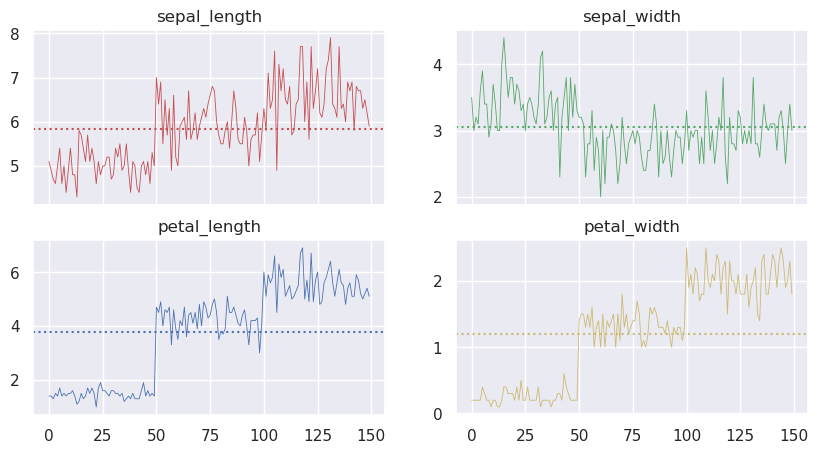

In [11]:
# visualization of the mean
fig, axs = plt.subplots(2, 2, figsize = (10, 5), sharex = True)
for j, name, axj, color in zip(range(X.shape[1]), iris.columns[:4], axs.flatten(), ['r', 'g', 'b', 'y']):
    axj.plot(X[:, j], c = color, linewidth = 0.6)
    axj.axhline(X[:, j].mean(), c = color, linestyle = 'dotted')
    axj.set_title(name)

#### centrality: median
- the *median* is the middle value in a sorted column vector

In [12]:
# median is a numpy method, not a numpy.array() method !!
np.median(X, axis = 0)

array([5.8 , 3.  , 4.35, 1.3 ])

In [13]:
# ex. median (column by column)
for j, name in zip(range(X.shape[1]), iris.columns[:4]):
    Xj = X[:, j].copy()
    Xj.sort()
    X_median = Xj[len(Xj) //2]
    print('+++ median %s %5.2f' %(name.ljust(20), X_median))

+++ median sepal_length          5.80
+++ median sepal_width           3.00
+++ median petal_length          4.40
+++ median petal_width           1.30


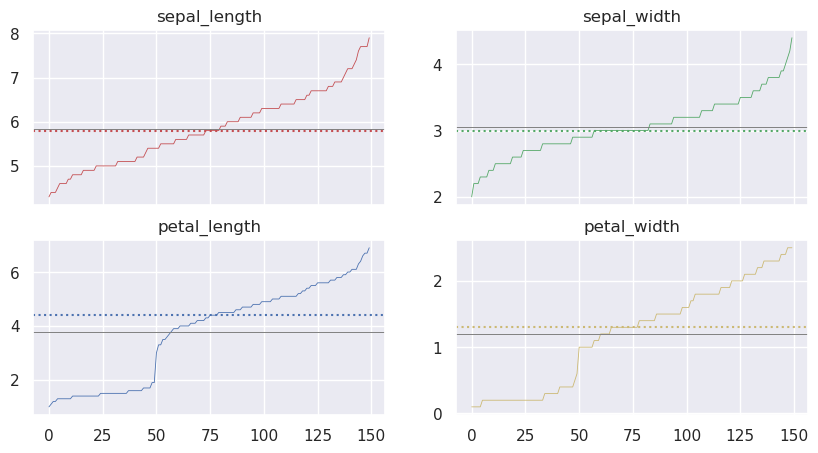

In [14]:
# visualization of the median (mean shown in gray)
fig, axs = plt.subplots(2, 2, figsize = (10, 5), sharex = True)
for j, name, axj, color in zip(range(X.shape[1]), iris.columns[:4], axs.flatten(), ['r', 'g', 'b', 'y']):
    Xj = X[:, j].copy()
    Xj.sort()
    X_median = Xj[len(Xj) //2]
    axj.plot(Xj, c = color, linewidth = 0.6)
    axj.axhline(X[:, j].mean(), c = 'gray', linewidth = 0.7)
    axj.axhline(X_median, c = color, linestyle = 'dotted')
    axj.set_title(name)

#### centrality: mode
- the *mode* is the most frequent value

In [15]:
# there is no numpy function but we can use scipy.stats.mode
from scipy.stats import mode
mode(X, axis = 0)

ModeResult(mode=array([5. , 3. , 1.4, 0.2]), count=array([10., 26., 13., 29.]))

In [16]:
# ex: manual computation using np.unique(Xj, return_counts = True)
np.unique(X[:, 0], return_counts = True)

(array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]),
 array([ 1,  3,  1,  4,  2,  5,  6, 10,  9,  4,  1,  6,  7,  6,  8,  7,  3,
         6,  6,  4,  9,  7,  5,  2,  8,  3,  4,  1,  1,  3,  1,  1,  1,  4,
         1]))

In [17]:
# ex:
for j, name in zip(range(X.shape[1]), iris.columns[:4]):
    Xj = np.unique(X[:, j], return_counts = True)
    X_mode = Xj[0][Xj[1].argmax()]
    print('+++ mode %s %5.2f, ... count %5.2f' %(name.ljust(20), X_mode, Xj[1].max()))

+++ mode sepal_length          5.00, ... count 10.00
+++ mode sepal_width           3.00, ... count 26.00
+++ mode petal_length          1.40, ... count 13.00
+++ mode petal_width           0.20, ... count 29.00


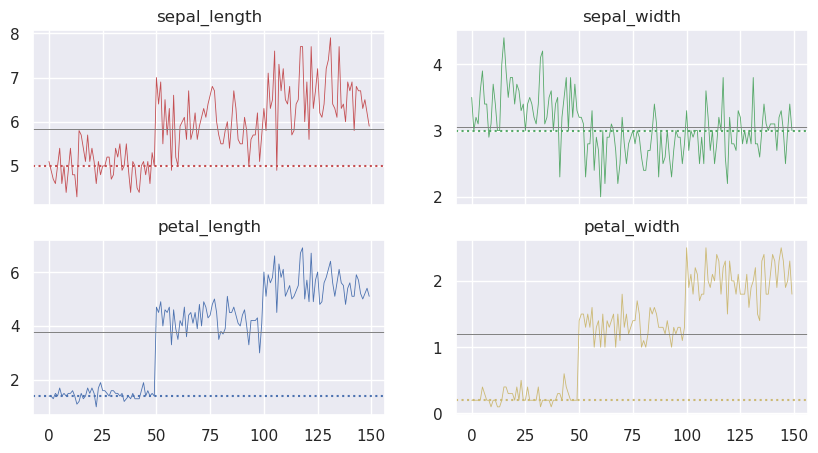

In [18]:
# visualization of the mode (mean shown in gray)
fig, axs = plt.subplots(2, 2, figsize = (10, 5), sharex = True)
for j, name, axj, color in zip(range(X.shape[1]), iris.columns[:4], axs.flatten(), ['r', 'g', 'b', 'y']):
    Xj = np.unique(X[:, j], return_counts = True)
    X_mode = Xj[0][Xj[1].argmax()]
    axj.plot(X[:, j], c = color, linewidth = 0.6)
    axj.axhline(X[:, j].mean(), c = 'gray', linewidth = 0.7)
    axj.axhline(X_mode, c = color, linestyle = 'dotted')
    axj.set_title(name)

#### dispersion: variance and standard deviation
- the *variance* is the average of the squared deviations from the mean
$$\sigma_j^2=\frac{1}{n}\sum_{i=1}^{n}\left(x_{i}-\bar{X}_j\right)^2\,,\quad j=1,\dots,m$$
- the *standard deviation* is the square root of the *variance* (expresses the dispersion in the same scale of the variable)
$$\sigma_j = \sqrt{\sigma_j^2}$$

In [19]:
X.var(axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [20]:
X.std(axis = 0)

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

In [21]:
# ex. manual computation of the variance
for j, name in zip(range(X.shape[1]), iris.columns[:4]):
    Xj, Xj_mean = X[:, j], X[:, j].mean()
    X_var = np.sum((Xj -Xj_mean)**2) /len(Xj)
    print('+++ var %s %5.2f' %(name.ljust(20), X_var))

+++ var sepal_length          0.68
+++ var sepal_width           0.19
+++ var petal_length          3.10
+++ var petal_width           0.58


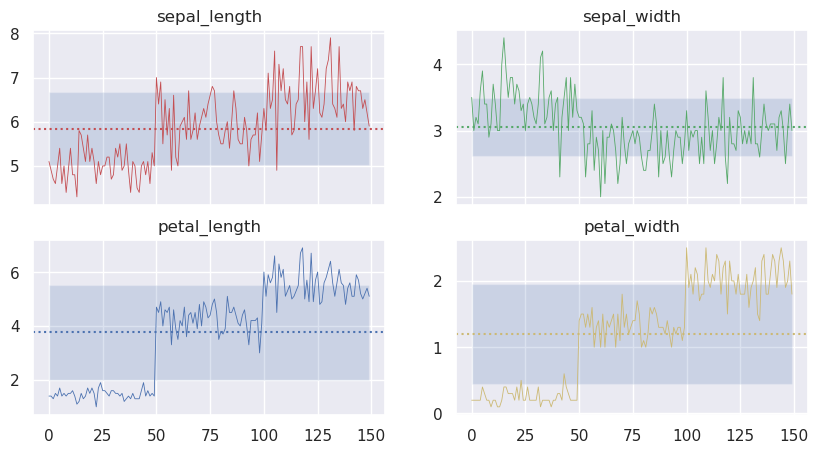

In [22]:
# visualization of the variance
fig, axs = plt.subplots(2, 2, figsize = (10, 5), sharex = True)
for j, name, axj, color in zip(range(X.shape[1]), iris.columns[:4], axs.flatten(), ['r', 'g', 'b', 'y']):
    axj.plot(X[:, j], c = color, linewidth = 0.6)
    axj.axhline(X[:, j].mean(), c = color, linestyle = 'dotted')
    X_std_sup = X[:, j].mean() +X[:, j].std()
    X_std_inf = X[:, j].mean() -X[:, j].std()
    axj.fill_between(np.arange(X.shape[0]), X_std_inf, X_std_sup, alpha = 0.2)    
    axj.set_title(name)

### statistics by class

In [23]:
# split the dataset by classes
X0 = iris.loc[iris.species == 'setosa', iris.dtypes == 'float'].to_numpy()
X1 = iris.loc[iris.species == 'virginica', iris.dtypes == 'float'].to_numpy()
X2 = iris.loc[iris.species == 'versicolor', iris.dtypes == 'float'].to_numpy()

In [24]:
# statistics by class
print(' '*21, end = '')
for spc in iris.species.unique(): print(spc.center(20), end = '')
print()
print(' '*21, '  mean   var   std ' *3)
for j, v in zip(range(X.shape[1]), iris.columns):
    print('+ %s ' %v.ljust(18), end = '')
    print('  %5.2f %5.2f %5.2f' %(X0[:, j].mean(), X0[:, j].var(), X0[:, j].std()), end = '')
    print('  %5.2f %5.2f %5.2f' %(X1[:, j].mean(), X1[:, j].var(), X1[:, j].std()), end = '')
    print('  %5.2f %5.2f %5.2f' %(X2[:, j].mean(), X2[:, j].var(), X2[:, j].std()), end = '')
    print()

                            setosa            versicolor          virginica      
                        mean   var   std   mean   var   std   mean   var   std 
+ sepal_length          5.01  0.12  0.35   6.59  0.40  0.63   5.94  0.26  0.51
+ sepal_width           3.43  0.14  0.38   2.97  0.10  0.32   2.77  0.10  0.31
+ petal_length          1.46  0.03  0.17   5.55  0.30  0.55   4.26  0.22  0.47
+ petal_width           0.25  0.01  0.10   2.03  0.07  0.27   1.33  0.04  0.20


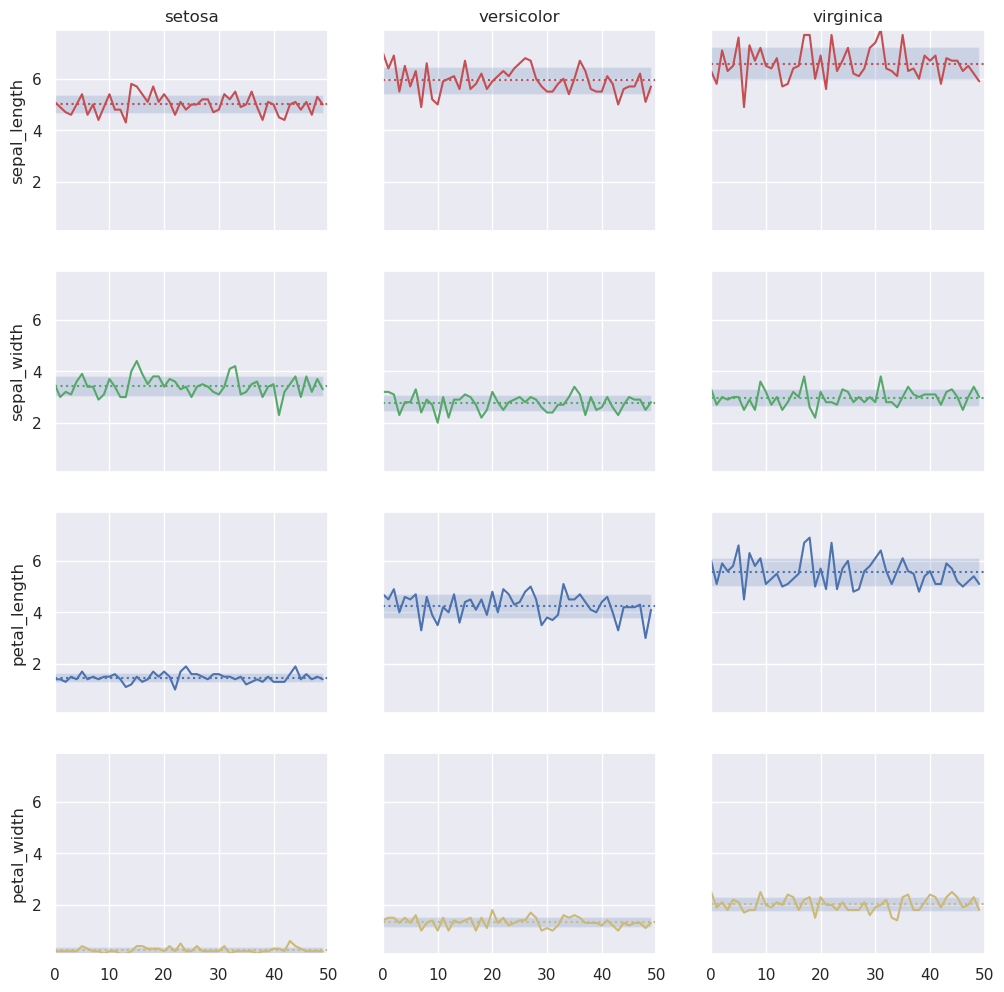

In [25]:
# visualize statistics by class
fig, axs = plt.subplots(4, 3, figsize = (12, 12), sharex = True, sharey = True)
for i, spc in enumerate(iris.species.unique()):
    X_ = iris.loc[iris.species == spc, iris.dtypes == 'float'].to_numpy()
    for j, axj, color in zip(range(X_.shape[1]), axs[:, i], ['r', 'g', 'b', 'y']):
        axj.set_xlim((0, X_.shape[0]))
        axj.set_ylim((X.min(), X.max())) # use global range
        axj.plot(X_[:, j], c = color)
        axj.axhline(X_[:, j].mean(), c = color, linestyle = 'dotted')
        axj.fill_between(np.arange(X_.shape[0]), X_[:, j].mean() -X_[:, j].std(), X_[:, j].mean() +X_[:, j].std(), alpha = 0.2)
        if i == 0: axj.set_ylabel(iris.columns[j])
        if j == 0: axj.set_title(spc)